# 실습을 통해 계층적 클러스터링 모델 이해하기

In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 가상의 분류용 데이터를 만들기 때문에 x와 y값으로 리턴한다.

X = make_blobs(n_samples=30, centers=1, cluster_std=0.5, random_state=30)
X = X[0]
X[:5]

array([[ 2.95001902, -2.93845794],
       [ 3.04444742, -2.8809474 ],
       [ 2.67136307, -1.85278916],
       [ 2.50084681, -2.77262446],
       [ 3.28812118, -2.90741939]])

https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

In [3]:
merge = linkage(X, method='complete')
merge

array([[2.00000000e+00, 8.00000000e+00, 2.59300226e-02, 2.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 5.38856444e-02, 2.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.10563035e-01, 2.00000000e+00],
       [1.00000000e+01, 2.30000000e+01, 1.11252335e-01, 2.00000000e+00],
       [9.00000000e+00, 1.60000000e+01, 1.49357922e-01, 2.00000000e+00],
       [2.80000000e+01, 3.00000000e+01, 1.75992946e-01, 3.00000000e+00],
       [1.80000000e+01, 3.30000000e+01, 1.77289405e-01, 3.00000000e+00],
       [2.20000000e+01, 2.90000000e+01, 1.98012672e-01, 2.00000000e+00],
       [2.00000000e+01, 2.40000000e+01, 2.43639817e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 2.64123157e-01, 2.00000000e+00],
       [1.40000000e+01, 2.70000000e+01, 2.81329612e-01, 2.00000000e+00],
       [2.50000000e+01, 3.20000000e+01, 3.27270224e-01, 3.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 3.61473967e-01, 3.00000000e+00],
       [7.00000000e+00, 1.50000000e+01, 3.63894711e

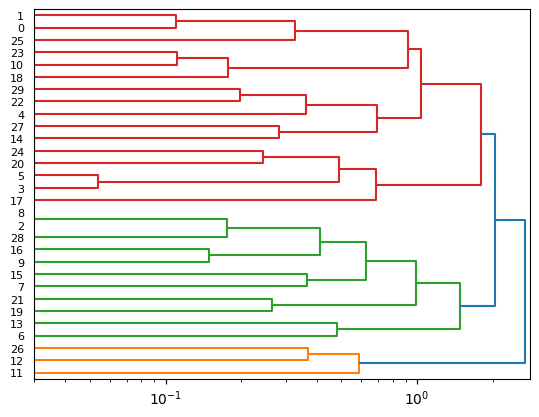

In [4]:
ax = plt.subplot(111)
dendrogram(merge, leaf_font_size=8, orientation='right')
ax.set_xlim(xmin=0.03)
ax.set_xscale('log')
plt.show()

출처 :
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-metrics-py


In [6]:
AgglomerativeClustering?

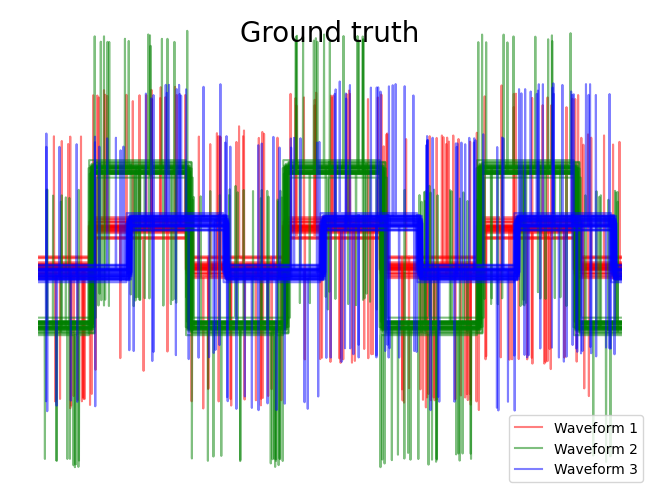

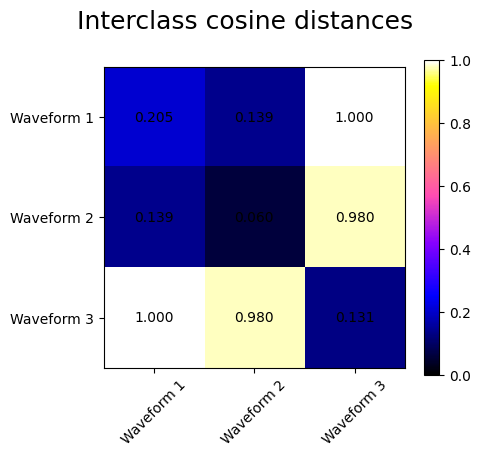

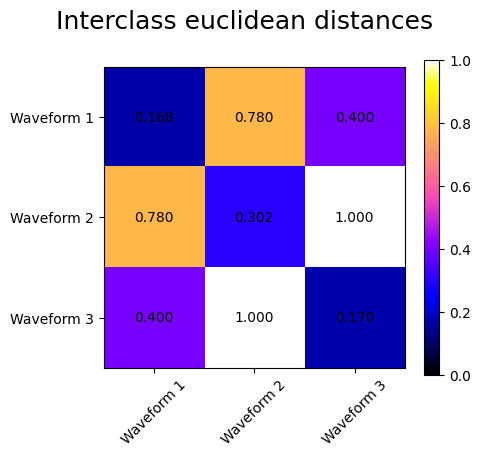

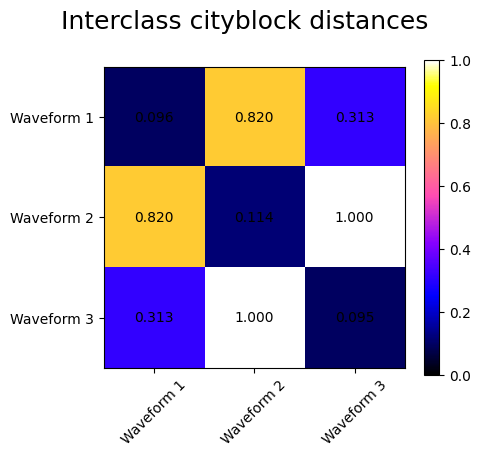

In [5]:
# Author: Gael Varoquaux
# License: BSD 3-Clause or CC-0

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

np.random.seed(0)

# 파형 데이터 생성
n_features = 2000
t = np.pi * np.linspace(0, 1, n_features)


def sqr(x):
    return np.sign(np.cos(x))

X = list()
y = list()
for i, (phi, a) in enumerate([(.5, .15), (.5, .6), (.3, .2)]):
    for _ in range(30):
        phase_noise = .01 * np.random.normal()
        amplitude_noise = .04 * np.random.normal()
        additional_noise = 1 - 2 * np.random.rand(n_features)
        # Make the noise sparse
        additional_noise[np.abs(additional_noise) < .997] = 0

        X.append(12 * ((a + amplitude_noise)
                 * (sqr(6 * (t + phi + phase_noise)))
                 + additional_noise))
        y.append(i)

X = np.array(X)
y = np.array(y)

# 클러스터의 개수
n_clusters = 3

labels = ('Waveform 1', 'Waveform 2', 'Waveform 3')

# 실제값 시각화
plt.figure()
plt.axes([0, 0, 1, 1])
for l, c, n in zip(range(n_clusters), 'rgb',
                   labels):
    lines = plt.plot(X[y == l].T, c=c, alpha=.5)
    lines[0].set_label(n)

plt.legend(loc='best')

plt.axis('tight')
plt.axis('off')
plt.suptitle("Ground truth", size=20)


# Plot the distances
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    avg_dist = np.zeros((n_clusters, n_clusters))
    plt.figure(figsize=(5, 4.5))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(X[y == i], X[y == j],
                                                metric=metric).mean()
    avg_dist /= avg_dist.max()
    for i in range(n_clusters):
        for j in range(n_clusters):
            plt.text(i, j, '%5.3f' % avg_dist[i, j],
                     verticalalignment='center',
                     horizontalalignment='center')

    plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2,
               vmin=0)
    plt.xticks(range(n_clusters), labels, rotation=45)
    plt.yticks(range(n_clusters), labels)
    plt.colorbar()
    plt.suptitle("Interclass %s distances" % metric, size=18)
    plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


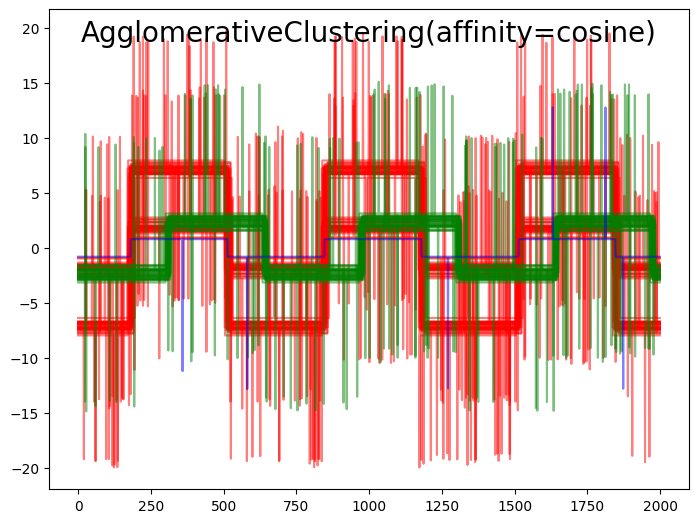

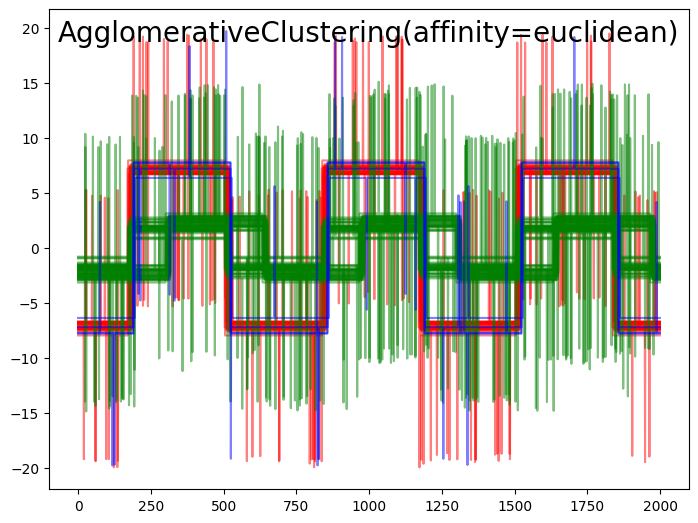

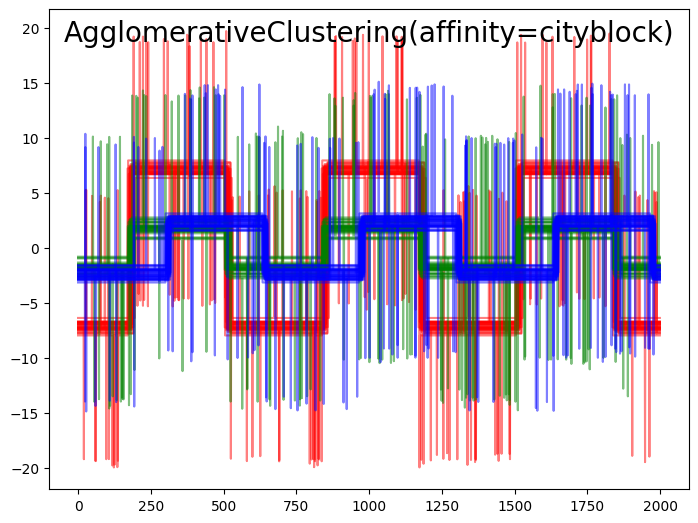

In [7]:
# Plot clustering results
for _, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=n_clusters,
                                    linkage="average", affinity=metric)
    model.fit(X)

    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, c in zip(np.arange(model.n_clusters), 'rgbk'):
        plt.plot(X[model.labels_ == l].T, c=c, alpha=.5)
    plt.axis('tight')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)


plt.show()